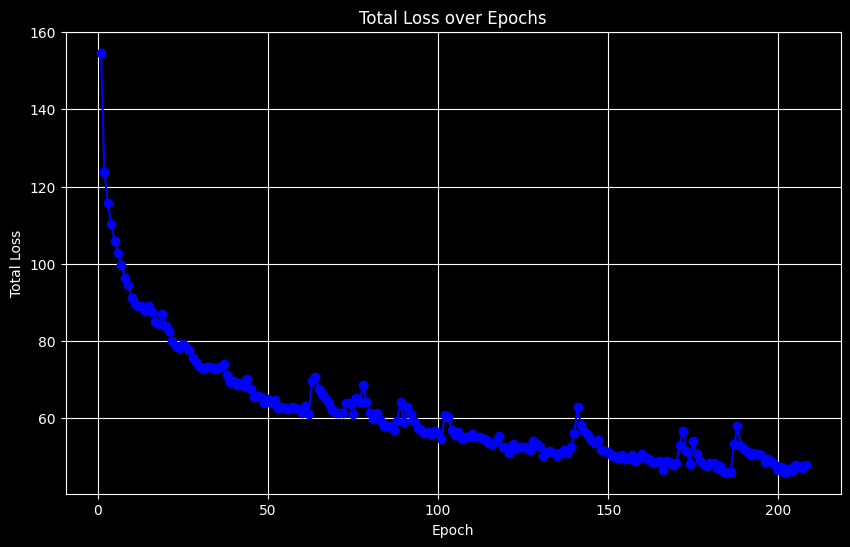

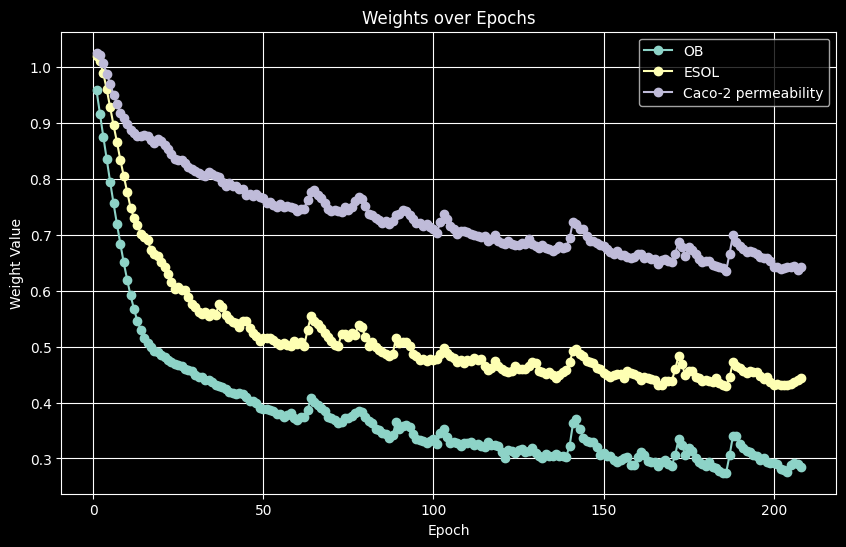

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'Result/training_log_20240815_160509_4429.csv'
data = pd.read_csv(file_path)

# Plot the total_loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(data['epoch'], data['total_loss'], marker='o', linestyle='-', color='b')
plt.title('Total Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.grid(True)
plt.savefig('total_loss_over_epochs.png')  # Save the figure
plt.show()

# Plot the weights over epochs
plt.figure(figsize=(10, 6))
plt.plot(data['epoch'], data['weight_0'], marker='o', linestyle='-', label='OB')
plt.plot(data['epoch'], data['weight_1'], marker='o', linestyle='-', label='ESOL')
plt.plot(data['epoch'], data['weight_2'], marker='o', linestyle='-', label='Caco-2 permeability')
plt.title('Weights over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Weight Value')
plt.legend()
plt.grid(True)
plt.savefig('weights_over_epochs.png')  # Save the figure
plt.show()


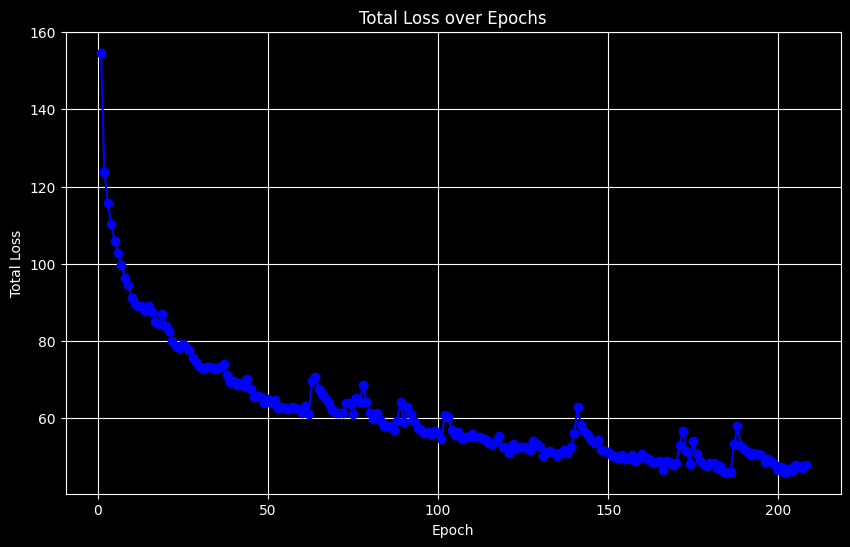

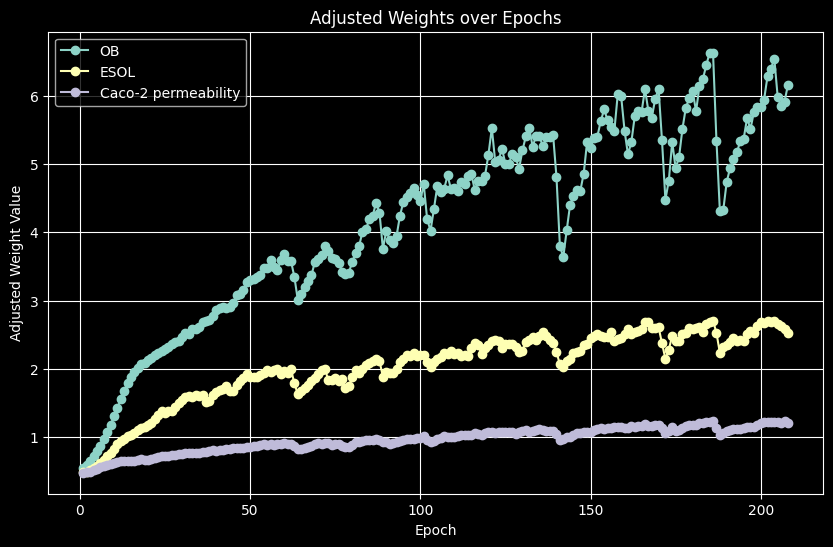

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'Result/training_log_20240815_160509_4429.csv'
data = pd.read_csv(file_path)

# Calculate the actual loss coefficients
data['weight_0'] = 0.5 / (data['weight_0'] ** 2)
data['weight_1'] = 0.5 / (data['weight_1'] ** 2)
data['weight_2'] = 0.5 / (data['weight_2'] ** 2)

# Plot the total_loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(data['epoch'], data['total_loss'], marker='o', linestyle='-', color='b')
plt.title('Total Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.grid(True)
plt.savefig('total_loss_over_epochs.png')  # Save the figure
plt.show()

# Plot the weights over epochs
plt.figure(figsize=(10, 6))
plt.plot(data['epoch'], data['weight_0'], marker='o', linestyle='-', label='OB')
plt.plot(data['epoch'], data['weight_1'], marker='o', linestyle='-', label='ESOL')
plt.plot(data['epoch'], data['weight_2'], marker='o', linestyle='-', label='Caco-2 permeability')
plt.title('Adjusted Weights over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Adjusted Weight Value')
plt.legend()
plt.grid(True)
plt.savefig('adjusted_weights_over_epochs.png')  # Save the figure
plt.show()


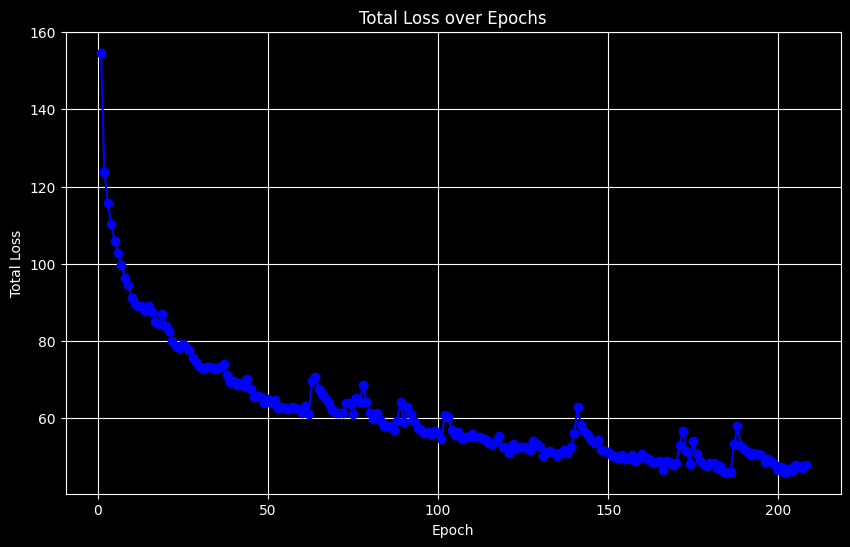

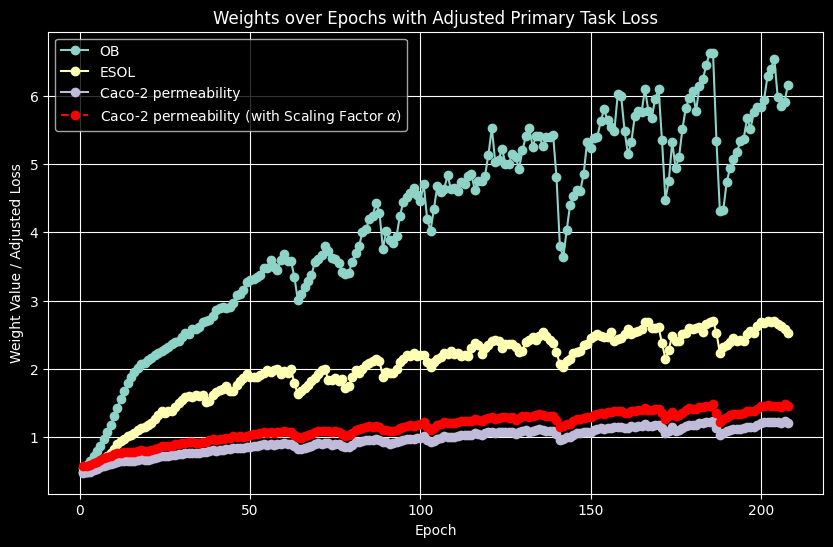

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'Result/training_log_20240815_160509_4429.csv'
data = pd.read_csv(file_path)

# Define the primary task weight (scaling factor \( \alpha \))
alpha = 1.2

# Calculate the actual loss coefficients for each task
data['weight_0'] = 0.5 / (data['weight_0'] ** 2)
data['weight_1'] = 0.5 / (data['weight_1'] ** 2)
data['weight_2'] = 0.5 / (data['weight_2'] ** 2)

# Calculate the adjusted loss for the primary task (Caco-2 permeability is 'weight_2')
data['primary_task_adjusted_loss'] = alpha * data['weight_2']

# Plot the total_loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(data['epoch'], data['total_loss'], marker='o', linestyle='-', color='b')
plt.title('Total Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.grid(True)
plt.savefig('total_loss_over_epochs.png')  # Save the figure
plt.show()

# Plot the weights over epochs including the adjusted primary task loss
plt.figure(figsize=(10, 6))
plt.plot(data['epoch'], data['weight_0'], marker='o', linestyle='-', label='OB')
plt.plot(data['epoch'], data['weight_1'], marker='o', linestyle='-', label='ESOL')
plt.plot(data['epoch'], data['weight_2'], marker='o', linestyle='-', label='Caco-2 permeability')
plt.plot(data['epoch'], data['primary_task_adjusted_loss'], marker='o', linestyle='--', 
         label=r'Caco-2 permeability (with Scaling Factor $\alpha$)', color='r')
plt.title('Weights over Epochs with Adjusted Primary Task Loss')
plt.xlabel('Epoch')
plt.ylabel('Weight Value / Adjusted Loss')
plt.legend()
plt.grid(True)
plt.savefig('weights_over_epochs_with_primary_task_adjusted_loss.png')  # Save the figure
plt.show()


In [11]:
import pandas as pd

# Load the CSV file
file_path = 'Result/training_log_20240815_160509_4429.csv'
data = pd.read_csv(file_path)

# Define the primary task weight (scaling factor \( \alpha \))
alpha = 1.2

# Calculate the actual loss coefficients for each task
data['OB_coefficient'] = 0.5 / (data['weight_0'] ** 2)
data['ESOL_coefficient'] = 0.5 / (data['weight_1'] ** 2)
data['Caco-2 permeability_coefficient'] = 0.5 / (data['weight_2'] ** 2)

# Calculate the adjusted loss for the primary task (Caco-2 permeability)
data['Caco-2 permeability (with Scaling Factor α)'] = alpha * data['Caco-2 permeability_coefficient']

# Save the updated data back to the CSV file
output_file_path = 'Result/updated_training_log_20240815_160509_4429.csv'
data.to_csv(output_file_path, index=False)

print(f"Updated CSV saved to {output_file_path}")


Updated CSV saved to Result/updated_training_log_20240815_160509_4429.csv


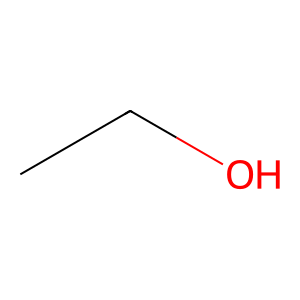

In [12]:
from rdkit import Chem
from rdkit.Chem import Draw

# Define the SMILES expression
smiles = 'c1(c(cccc1Cl)Cl)N=C1NCCN1'  # Example: ethanol

# Convert the SMILES string to a molecule object
mol = Chem.MolFromSmiles(smiles)

# Draw the molecule and save it as a PNG image
img = Draw.MolToImage(mol)

# Save the image to a file
img.save('molecule.png')

# If you want to display the image within a Jupyter Notebook
img.show()
